
 Tabel Data Perhitungan 
 	 j 	 x(j) 	 a(j) 	 b(j) 	 c(j) 	 d(j) 

	 j 	 x 	 a 	 b 	 c 	 d 

	 0 	 0.0 	 5.0 	 -3.7714434433596695 	 0.0 	 1.1928608608399174 

	 1 	 2.0 	 7.0 	 10.542886886719339 	 7.157165165039504 	 -125.86034032232969 

	 2 	 2.1 	 8.0 	 8.198509710057344 	 -30.60093693165944 	 22.64485620794587 

	 3 	 3.0 	 7.1 	 8.143823818378808 	 30.5401748297944 	 -119.78413013582576 

	 4 	 3.1 	 8.1 	 10.658334880262915 	 -5.395064210953361 	 -8.398490235067767 

	 5 	 4.0 	 7.2 	 -19.461111970667808 	 -28.070987845636328 	 126.8210755231357 

	 6 	 4.1 	 5.1 	 -21.27067727410101 	 9.97533481130425 	 -1.1576257373007588 

	 7 	 8.0 	 5.2 	 3.714471861038515 	 -3.5688863151146295 	 -1.3455855459238852 

	 8 	 9.0 	 4.0 	 -7.4600574069624015 	 -7.605642952886285 	 13.065700359848686 

	 9 	 10.0 	 2.0 	 16.525757766811086 	 31.591458126659774 	 13.32770794576741 

	 10 	 9.1 	 3.0 	 -7.9525365529617 	 -4.393353326912244 	 -60.81281143471132 

	 11 	 9.2 	 2.1 	 -10.655591561

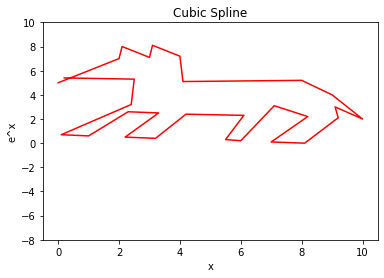

In [2]:
from numpy import*
import numpy
import matplotlib.pylab as plt



x = [0.0,2.0,2.1,3.0,3.1,4.0,4.1,8.0,9.0,10.0,9.1,9.2,8.1,7.0,8.2,7.1,6.0,5.5,6.1,4.2,3.2,2.2,3.3,2.3,1.0,0.1,2.4,2.5,0.2]
y = [5.0,7.0,8.0,7.1,8.1,7.2,5.1,5.2,4.0,2.0,3.0,2.1,0.0,0.1,2.2,3.1,0.2,0.3,2.3,2.4,0.4,0.5,2.5,2.6,0.6,0.7,3.2,5.3,5.4]
n=len(x)-1


print ('\n','Tabel Data Perhitungan','\n',  '\t','j','\t','x(j)','\t','a(j)','\t','b(j)','\t','c(j)','\t','d(j)','\n')
a=[y[i] for i in range (n+1)]
h = [x[i+1]-x[i] for i in range(n)]
alp = [3*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1]) for i in range(1,n)]
alp.insert(0,0)

l = [1] * (n+1)
miu = [0] * (n+1)
z = [0] * (n+1)
for i in range (1, n,1):
    l[i]=(2*(x[i+1]-x[i-1]))-(h[i-1]*miu[i-1])
    miu[i]=h[i]/l[i]
    z[i]=(alp[i]-h[i-1]*z[i-1])/l[i]
b = [0] * (n+1)
c = [0] * (n+1)
d = [0] * (n+1)
for j in range(n-1, -1, -1):
    c[j]=z[j]-miu[j]*c[j+1]
    b[j]=(a[j+1]-a[j])/h[j]-(h[j]*(c[j+1]+2*c[j]))/3
    d[j]=(c[j+1]-c[j])/(3*h[j])
print ('\t','j','\t','x','\t','a','\t','b','\t','c','\t','d','\n')
for j in range (0,n):
    print ('\t', j , '\t',x[j] ,'\t', a[j], '\t', b[j], '\t' ,c[j] , '\t' , d[j], '\n')
    
print ('\t' ,n, '\t' ,x[n], '\t', a[n])

m=int(input("Masukkan banyaknya titik dalam selang : "))
print ('Hasil interpolasi titik','\n')
print ('x', '\t','S','\n')
bb=0
ba=0
xl=0
S=0
for j in range (0,n):
    bb=x[j]
    ba=x[j+1]
    for i in range (0, m+1):
        xl=bb+((i*(ba-bb))/m)
        S= a[j]+(b[j]*(xl-x[j]))+(c[j]*(xl-x[j]))+(d[j]*(xl-x[j]))
        print(xl,'\t',S)
plt.plot(x,y,'r',xl,S)
plt.title('Cubic Spline')
plt.xlabel('x')
plt.ylabel('e^x')
plt.ylim([-8,10])
plt.show()